In [1]:
!pip install matplotlib

In [2]:
!pip install pennylane

In [3]:
!pip install tensorflow

In [4]:
!pip install tqdm

In [5]:
%matplotlib inline

In [6]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tqdm import tqdm

2022-08-22 09:29:37.106409: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-22 09:29:37.106433: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
n_epochs = 30   
n_layers = 30    
n_train = 500    
n_test = 300
batch_size = 1     
# Кількість епох навчання
# Кількість випадкових шарів
# Розмір тренувального датасету
# Розмір тестувального датасету
SAVE_PATH = "./quanvolution/"
# PREPROCESS = False
PREPROCESS = True
np.random.seed(0)          
tf.random.set_seed(0) 

In [8]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# зменьшення розміру
train_images = train_images[:n_train]
train_labels_mnist = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels_mnist = test_labels[:n_test]

# Normalize 
train_images = train_images / 255
test_images = test_images / 255

train_images_mnist = np.array(train_images[..., tf.newaxis], requires_grad=False)
test_images_mnist = np.array(test_images[..., tf.newaxis], requires_grad=False)

In [9]:
fashion_dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_dataset.load_data()

# зменьшення розміру
train_images = train_images[:n_train]
train_labels_fashion = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels_fashion = test_labels[:n_test]

# Normalize
train_images = train_images / 255
test_images = test_images / 255

train_images_fashion = np.array(train_images[..., tf.newaxis], requires_grad=False)
test_images_fashion = np.array(test_images[..., tf.newaxis], requires_grad=False)

In [10]:
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

# зменьшення розміру
train_images = train_images[:n_train]
train_labels_cifar = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels_cifar = test_labels[:n_test]

# Normalize
cifar_train_images = train_images / 255
test_images = test_images / 255


train_images_cifar = np.array(cifar_train_images[..., tf.newaxis], requires_grad=False)
test_images_cifar = np.array(test_images[..., tf.newaxis], requires_grad=False)
train_images_cifar = np.squeeze(train_images_cifar)
test_images_cifar = np.squeeze(test_images_cifar)


In [11]:
dev = qml.device("default.qubit", wires=4)
# Random circuit параметр
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    # кодування класичних 4-х входів
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

In [12]:
def quanv(image):
    """Попередьня квантумна конволюція зображень"""
    out = np.zeros((14, 14, 4))

    # вриділення квадратів 2*2 
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Виділення різних рівнів на зображенні (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

def quanv_cifar(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((16, 16, 4))

    # вриділення квадратів 2*2 
    for j in range(0, 32, 2):
        for k in range(0, 32, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                  [
                      image[j, k, 0],
                      image[j, k + 1, 0],
                      image[j + 1, k, 0],
                      image[j + 1, k + 1, 0]
                  ]
            )
             # Виділення різних рівнів на зображенні (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

In [13]:
from tqdm.notebook import tqdm

In [14]:
!pip show ipywidgets

Name: ipywidgets
Version: 7.0.0
Summary: IPython HTML widgets for Jupyter
Home-page: http://ipython.org
Author: IPython Development Team
Author-email: ipython-dev@scipy.org
License: BSD
Location: /home/yevhenii/.local/lib/python3.8/site-packages
Requires: ipykernel, nbformat, traitlets, widgetsnbextension, ipython
Required-by: 


In [15]:
# !pip install -Iv ipywidgets==7.0.0

In [16]:
if PREPROCESS == True:
#     q_train_images_mnist = []
#     print("Quantum pre-processing of train images:")
#     for idx, img in tqdm(enumerate(train_images_mnist)):
#         print("{}/{}        ".format(idx + 1, n_train), end="\r")
#         q_train_images_mnist.append(quanv(img))
#     q_train_images_mnist = np.asarray(q_train_images_mnist)

#     q_test_images_mnist = []
#     print("\nQuantum pre-processing of test images:")
#     for idx, img in tqdm(enumerate(test_images_mnist)):
#         print("{}/{}        ".format(idx + 1, n_test), end="\r")
#         q_test_images_mnist.append(quanv(img))
#     q_test_images_mnist = np.asarray(q_test_images_mnist)

#     np.save(SAVE_PATH + "q_train_images_mnist.npy", q_train_images_mnist)
#     np.save(SAVE_PATH + "q_test_images_mnist.npy", q_test_images_mnist)

    q_train_images_fashion = []
    print("Quantum pre-processing of train images:")
    for idx, img in tqdm(enumerate(train_images_fashion)):
        print("{}/{}        ".format(idx + 1, n_train), end="\r")
        q_train_images_fashion.append(quanv(img))
    q_train_images_fashion = np.asarray(q_train_images_fashion)

    q_test_images_fashion = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in tqdm(enumerate(test_images_fashion)):
        print("{}/{}        ".format(idx + 1, n_test), end="\r")
        q_test_images_fashion.append(quanv(img))
    q_test_images_fashion = np.asarray(q_test_images_fashion)

    np.save(SAVE_PATH + "q_train_images_fashion.npy", q_train_images_fashion)
    np.save(SAVE_PATH + "q_test_images_fashion.npy", q_test_images_fashion)

    q_train_images_cifar = []
    print("Quantum pre-processing of train images:")
    for idx, img in tqdm(enumerate(train_images_cifar)):
        print("{}/{}        ".format(idx + 1, n_train), end="\r")
        q_train_images_cifar.append(quanv_cifar(img))
    q_train_images_cifar = np.asarray(q_train_images_cifar)

    q_test_images_cifar = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in tqdm(enumerate(test_images_cifar)):
        print("{}/{}        ".format(idx + 1, n_test), end="\r")
        q_test_images_cifar.append(quanv_cifar(img))
    q_test_images_cifar = np.asarray(q_test_images_cifar)

    np.save(SAVE_PATH + "q_train_images_cifar.npy", q_train_images_cifar)
    np.save(SAVE_PATH + "q_test_images_cifar.npy", q_test_images_cifar)


q_train_images_mnist = np.load(SAVE_PATH + "q_train_images_mnist.npy")
q_test_images_mnist = np.load(SAVE_PATH + "q_test_images_mnist.npy")

q_train_images_fashion = np.load(SAVE_PATH + "q_train_images_fashion.npy")
q_test_images_fashion = np.load(SAVE_PATH + "q_test_images_fashion.npy")

q_train_images_cifar = np.load(SAVE_PATH + "q_train_images_cifar.npy")
q_test_images_cifar = np.load(SAVE_PATH + "q_test_images_cifar.npy")

Quantum pre-processing of train images:


A Jupyter Widget

500/500        
Quantum pre-processing of test images:


A Jupyter Widget

Quantum pre-processing of train images:


A Jupyter Widget

500/500        
Quantum pre-processing of test images:


A Jupyter Widget

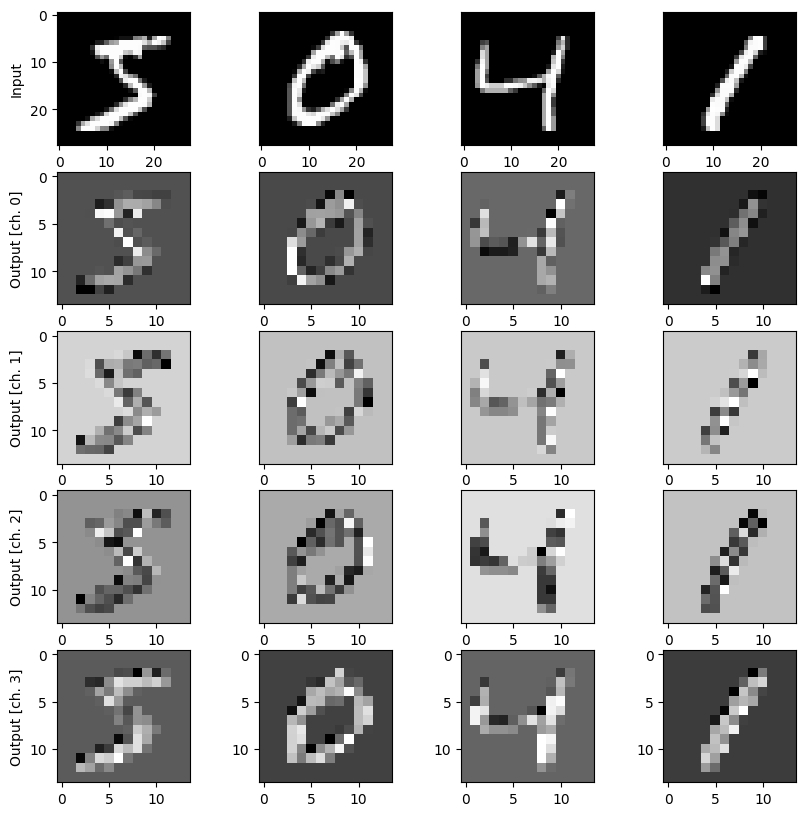

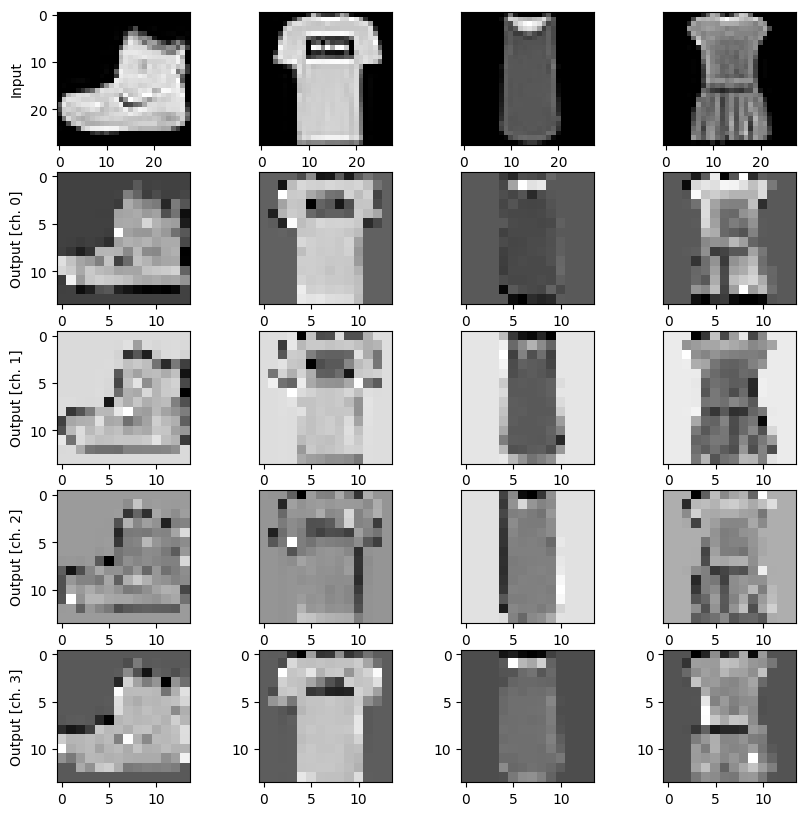

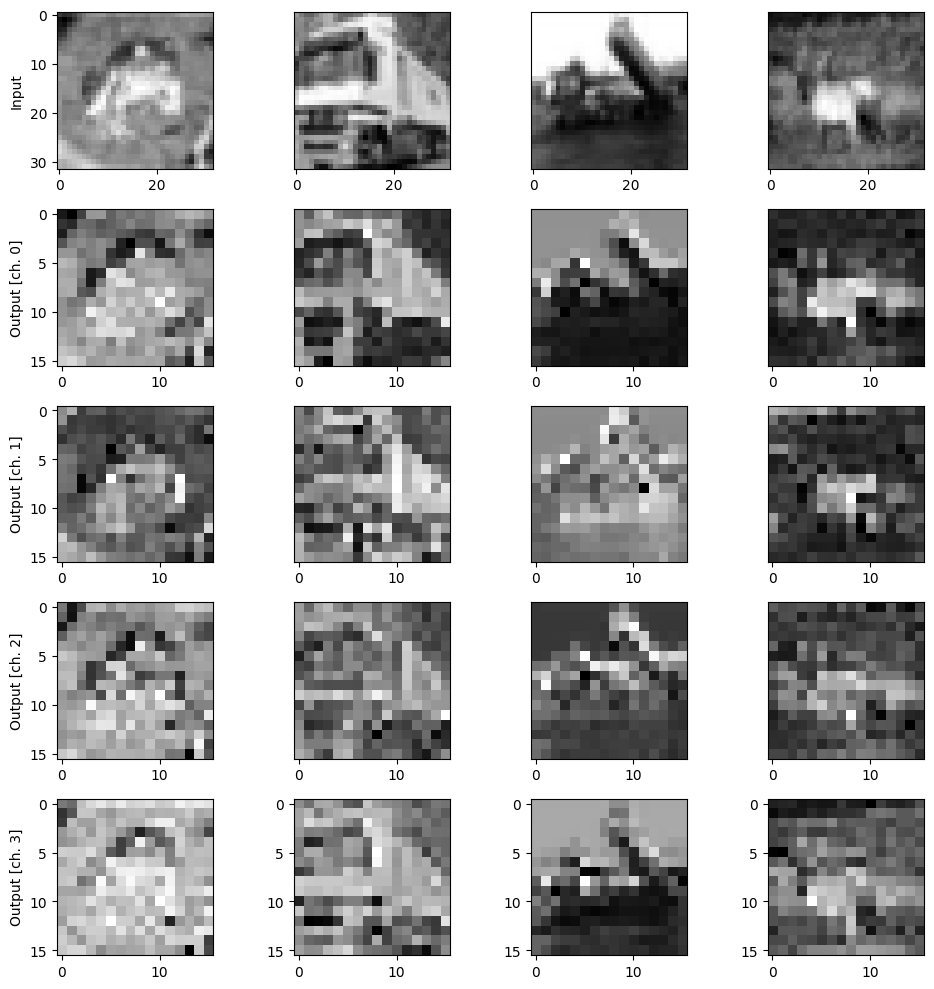

In [17]:
# зобрадення всіх рівнів зображень
n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images_mnist[k, :, :, 0], cmap="gray")


    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images_mnist[k, :, :, c], cmap="gray")

fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images_fashion[k, :, :, 0], cmap="gray")


    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images_fashion[k, :, :, c], cmap="gray")
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images_cifar[k, :, :, 0], cmap="gray")

    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images_cifar[k, :, :, c], cmap="gray")


plt.tight_layout()
plt.show()

In [18]:
def MyModel():
    """ініціалізаціія Keras model
    """
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [28]:
model = MyModel()
dot_img_file = '/tmp/model_1.png'
# model.summary()

# tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [23]:
# тренування квантомних моделй моделей
q_model_mnist = MyModel()

q_history_mnist = q_model_mnist.fit(
    q_train_images_mnist,
    train_labels_mnist,
    validation_data=(q_test_images_mnist, test_labels_mnist),
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=2,
)

q_model_fashion = MyModel()

q_history_fashion = q_model_fashion.fit(
    q_train_images_fashion,
    train_labels_fashion,
    validation_data=(q_test_images_fashion, test_labels_fashion),
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=2,
)

q_model_cifar = MyModel()

q_history_cifar = q_model_cifar.fit(
    q_train_images_cifar,
    train_labels_cifar,
    validation_data=(q_test_images_cifar, test_labels_cifar),
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/30
500/500 - 1s - loss: 1.8041 - accuracy: 0.4500 - val_loss: 1.4958 - val_accuracy: 0.6067 - 637ms/epoch - 1ms/step
Epoch 2/30
500/500 - 0s - loss: 1.0711 - accuracy: 0.7800 - val_loss: 1.1703 - val_accuracy: 0.6567 - 391ms/epoch - 783us/step
Epoch 3/30
500/500 - 0s - loss: 0.7423 - accuracy: 0.8360 - val_loss: 1.0075 - val_accuracy: 0.7333 - 378ms/epoch - 756us/step
Epoch 4/30
500/500 - 0s - loss: 0.5862 - accuracy: 0.8700 - val_loss: 0.8925 - val_accuracy: 0.7367 - 379ms/epoch - 758us/step
Epoch 5/30
500/500 - 0s - loss: 0.4706 - accuracy: 0.9160 - val_loss: 0.7970 - val_accuracy: 0.7700 - 385ms/epoch - 770us/step
Epoch 6/30
500/500 - 0s - loss: 0.3866 - accuracy: 0.9280 - val_loss: 0.7631 - val_accuracy: 0.7700 - 374ms/epoch - 748us/step
Epoch 7/30
500/500 - 0s - loss: 0.3260 - accuracy: 0.9460 - val_loss: 0.7165 - val_accuracy: 0.7767 - 382ms/epoch - 763us/step
Epoch 8/30
500/500 - 0s - loss: 0.2810 - accuracy: 0.9620 - val_loss: 0.6843 - val_accuracy: 0.7767 - 380ms/epoch

Epoch 6/30
500/500 - 0s - loss: 1.2549 - accuracy: 0.6800 - val_loss: 2.3165 - val_accuracy: 0.1867 - 385ms/epoch - 770us/step
Epoch 7/30
500/500 - 0s - loss: 1.1388 - accuracy: 0.7420 - val_loss: 2.3486 - val_accuracy: 0.1867 - 380ms/epoch - 760us/step
Epoch 8/30
500/500 - 0s - loss: 1.0390 - accuracy: 0.7560 - val_loss: 2.3852 - val_accuracy: 0.1900 - 388ms/epoch - 777us/step
Epoch 9/30
500/500 - 0s - loss: 0.9489 - accuracy: 0.8000 - val_loss: 2.4322 - val_accuracy: 0.1900 - 383ms/epoch - 766us/step
Epoch 10/30
500/500 - 0s - loss: 0.8709 - accuracy: 0.8240 - val_loss: 2.4082 - val_accuracy: 0.2033 - 381ms/epoch - 762us/step
Epoch 11/30
500/500 - 0s - loss: 0.7955 - accuracy: 0.8560 - val_loss: 2.4924 - val_accuracy: 0.2100 - 388ms/epoch - 776us/step
Epoch 12/30
500/500 - 0s - loss: 0.7329 - accuracy: 0.8740 - val_loss: 2.5155 - val_accuracy: 0.1933 - 380ms/epoch - 761us/step
Epoch 13/30
500/500 - 0s - loss: 0.6752 - accuracy: 0.8980 - val_loss: 2.5672 - val_accuracy: 0.1800 - 392ms

In [24]:
# треунвання класичних моделей
c_model_mnist = MyModel()

c_history_mnist = c_model_mnist.fit(
    train_images_mnist,
    train_labels_mnist,
    validation_data=(test_images_mnist, test_labels_mnist),
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=2,
)

c_model_fashion = MyModel()

c_history_fashion = c_model_fashion.fit(
    train_images_fashion,
    train_labels_fashion,
    validation_data=(test_images_fashion, test_labels_fashion),
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=2,
)

c_model_cifar = MyModel()

c_history_cifar = c_model_cifar.fit(
    train_images_cifar,
    train_labels_cifar,
    validation_data=(test_images_cifar, test_labels_cifar),
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/30
500/500 - 1s - loss: 1.1966 - accuracy: 0.6900 - val_loss: 0.8996 - val_accuracy: 0.7333 - 565ms/epoch - 1ms/step
Epoch 2/30
500/500 - 0s - loss: 0.5115 - accuracy: 0.8740 - val_loss: 0.6924 - val_accuracy: 0.7800 - 380ms/epoch - 760us/step
Epoch 3/30
500/500 - 0s - loss: 0.3551 - accuracy: 0.9140 - val_loss: 0.5887 - val_accuracy: 0.8300 - 383ms/epoch - 766us/step
Epoch 4/30
500/500 - 0s - loss: 0.2706 - accuracy: 0.9320 - val_loss: 0.5108 - val_accuracy: 0.8433 - 384ms/epoch - 768us/step
Epoch 5/30
500/500 - 0s - loss: 0.2147 - accuracy: 0.9440 - val_loss: 0.4897 - val_accuracy: 0.8600 - 393ms/epoch - 787us/step
Epoch 6/30
500/500 - 0s - loss: 0.1672 - accuracy: 0.9640 - val_loss: 0.4515 - val_accuracy: 0.8700 - 381ms/epoch - 762us/step
Epoch 7/30
500/500 - 0s - loss: 0.1356 - accuracy: 0.9780 - val_loss: 0.4346 - val_accuracy: 0.8600 - 391ms/epoch - 782us/step
Epoch 8/30
500/500 - 0s - loss: 0.1098 - accuracy: 0.9860 - val_loss: 0.4233 - val_accuracy: 0.8600 - 384ms/epoch

Epoch 6/30
500/500 - 0s - loss: 2.2143 - accuracy: 0.4180 - val_loss: 3.7339 - val_accuracy: 0.1667 - 389ms/epoch - 778us/step
Epoch 7/30
500/500 - 0s - loss: 2.1165 - accuracy: 0.4120 - val_loss: 2.8466 - val_accuracy: 0.1933 - 395ms/epoch - 789us/step
Epoch 8/30
500/500 - 0s - loss: 1.8880 - accuracy: 0.4380 - val_loss: 3.0808 - val_accuracy: 0.2233 - 396ms/epoch - 792us/step
Epoch 9/30
500/500 - 0s - loss: 1.7068 - accuracy: 0.5280 - val_loss: 3.0948 - val_accuracy: 0.1867 - 390ms/epoch - 780us/step
Epoch 10/30
500/500 - 0s - loss: 1.7621 - accuracy: 0.5040 - val_loss: 3.3161 - val_accuracy: 0.2167 - 390ms/epoch - 781us/step
Epoch 11/30
500/500 - 0s - loss: 1.7777 - accuracy: 0.5240 - val_loss: 4.3334 - val_accuracy: 0.2133 - 390ms/epoch - 781us/step
Epoch 12/30
500/500 - 0s - loss: 1.6794 - accuracy: 0.5180 - val_loss: 4.7285 - val_accuracy: 0.1800 - 388ms/epoch - 777us/step
Epoch 13/30
500/500 - 0s - loss: 1.4656 - accuracy: 0.5620 - val_loss: 3.9224 - val_accuracy: 0.1733 - 393ms

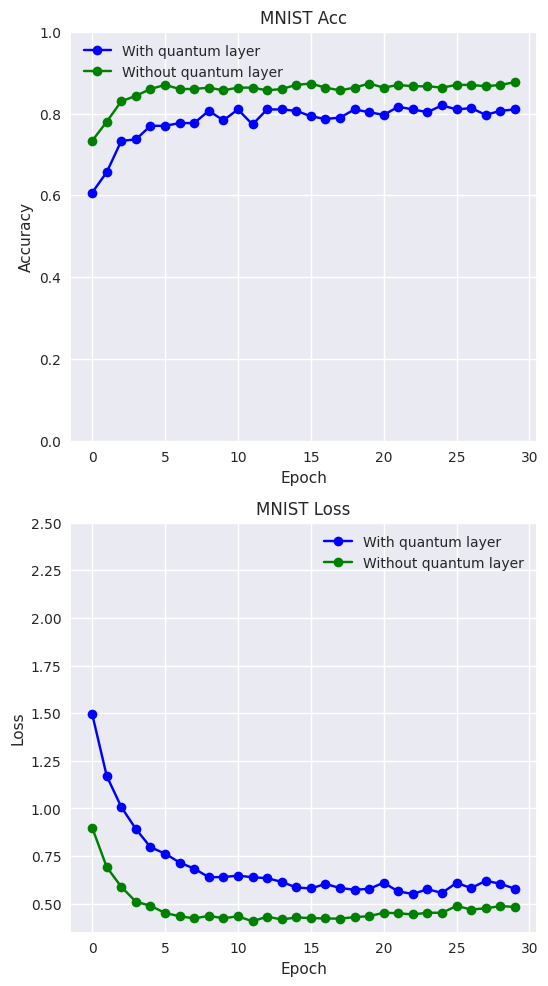

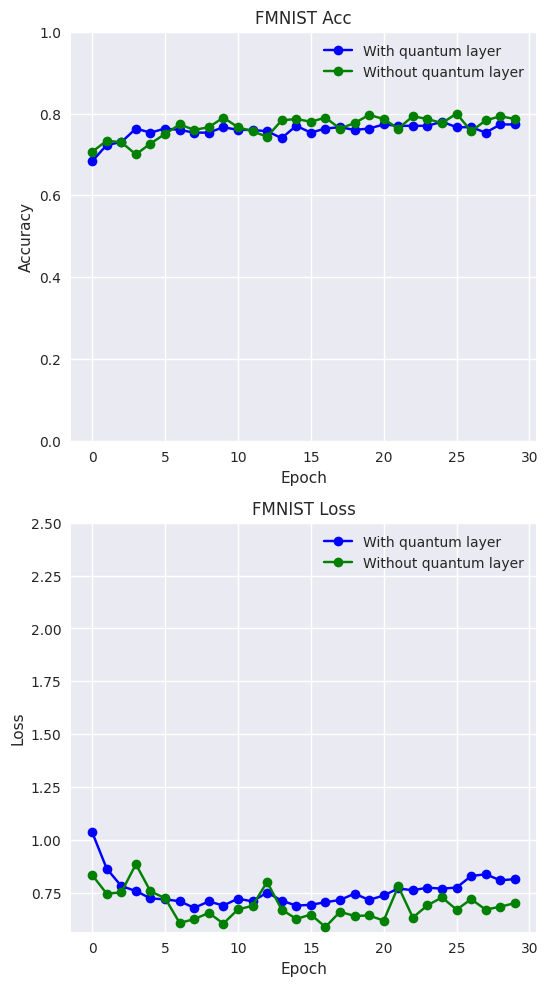

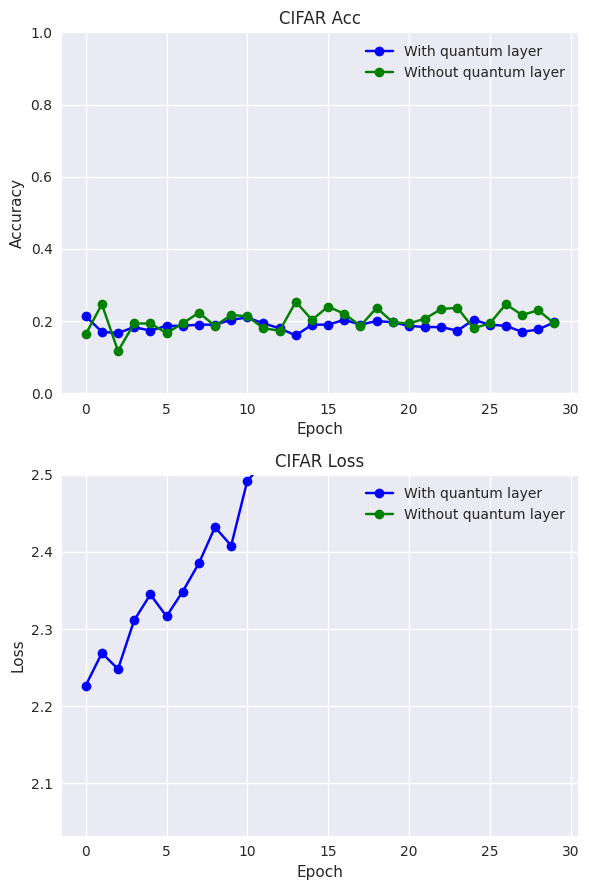

In [25]:
# Зображення графіків тренування мереж
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))


ax1.plot(q_history_mnist.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history_mnist.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.set_title("MNIST Acc")
ax1.legend()

ax2.plot(q_history_mnist.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history_mnist.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.set_title("MNIST Loss")
ax2.legend()
plt.subplots_adjust(bottom=1, top=2)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))


ax1.plot(q_history_fashion.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history_fashion.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.set_title("FMNIST Acc")

ax1.legend()

ax2.plot(q_history_fashion.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history_fashion.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.set_title("FMNIST Loss")
ax2.legend()
plt.subplots_adjust(bottom=1, top=2)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history_cifar.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history_cifar.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.set_title("CIFAR Acc")

ax1.legend()

ax2.plot(q_history_cifar.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history_cifar.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.set_title("CIFAR Loss")
ax2.legend()

plt.subplots_adjust(bottom=1, top=2)
plt.tight_layout()
plt.show()

In [26]:
def print_params(q_history, c_history, name):
  print(f"Classsic Neural Network result for {name} dataset:")
  print(f'Best Acc:\n{round(max(c_history.history["val_accuracy"]), 4)}')
  print(f'Best Loss:\n{round(min(c_history.history["val_loss"]), 4)}\n')

  print(f"Quantum Neural Network result for {name} dataset:")
  print(f'Best Acc:\n{round(max(q_history.history["val_accuracy"]), 4)}')
  print(f'Best Loss:\n{round(min(q_history.history["val_loss"]), 4)}\n\n')

In [27]:
print_params(q_history_mnist, c_history_mnist, "MNIST")
print_params(q_history_fashion, c_history_fashion, "FMNIST")
print_params(q_history_cifar, c_history_cifar, "CIFAR")

Classsic Neural Network result for MNIST dataset:
Best Acc:
0.8767
Best Loss:
0.4077

Quantum Neural Network result for MNIST dataset:
Best Acc:
0.82
Best Loss:
0.5517


Classsic Neural Network result for FMNIST dataset:
Best Acc:
0.8
Best Loss:
0.5887

Quantum Neural Network result for FMNIST dataset:
Best Acc:
0.78
Best Loss:
0.6792


Classsic Neural Network result for CIFAR dataset:
Best Acc:
0.2533
Best Loss:
2.8466

Quantum Neural Network result for CIFAR dataset:
Best Acc:
0.2133
Best Loss:
2.2269




In [30]:
!pip install pydot

/home/yevhenii/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/yevhenii/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [31]:
c_model_mnist.summary()
tf.keras.utils.plot_model(c_model_mnist, to_file='./model_c_model_mnist.png', show_shapes=True)
c_model_fashion.summary()
tf.keras.utils.plot_model(c_model_fashion, to_file='./model_c_model_fashion.png', show_shapes=True)
c_model_cifar.summary()
tf.keras.utils.plot_model(c_model_cifar, to_file='./model_c_model_cifar.png', show_shapes=True)


q_model_mnist.summary()
tf.keras.utils.plot_model(q_model_mnist, to_file='./model_q_model_mnist.png', show_shapes=True)
q_model_fashion.summary()
tf.keras.utils.plot_model(q_model_fashion, to_file='./model_q_model_fashion.png', show_shapes=True)
q_model_cifar.summary()
tf.keras.utils.plot_model(q_model_cifar, to_file='./model_q_model_cifar.png', show_shapes=True)



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (1, 784)                  0         
                                                                 
 dense_7 (Dense)             (1, 10)                   7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (1, 784)                  0         
                                                                 
